In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Hepatitis/HepatitisCdata.csv")

In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [ ]:
df.Category.unique()


array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [ ]:
array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

NameError: ignored

In [ ]:

df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

df['Sex'] = df['Sex'].map({'m': 1, 'f': 2})

In [ ]:
df.head()


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
# Checking the data types again after the transformation
df.dtypes

Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [ ]:
df.isna().sum()


Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [ ]:
df.fillna(df.median(), inplace=True)


In [ ]:
df.isna().sum()


Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

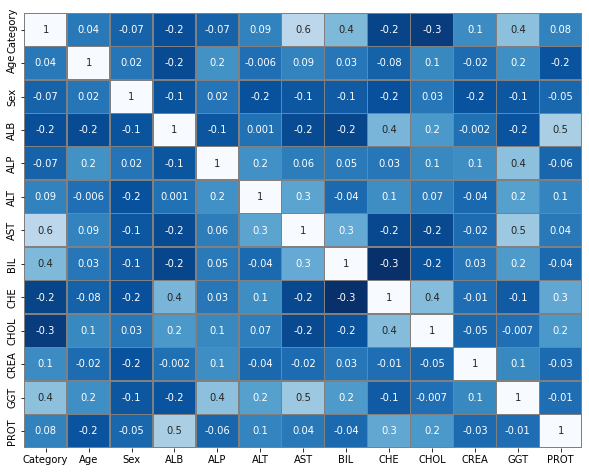

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey');

In [ ]:
print ('Total Suspected Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[1]))

Total Suspected Patients : 540 
Total Healthy Patients : 75 


In [ ]:
df.Sex.value_counts()

1    377
2    238
Name: Sex, dtype: int64

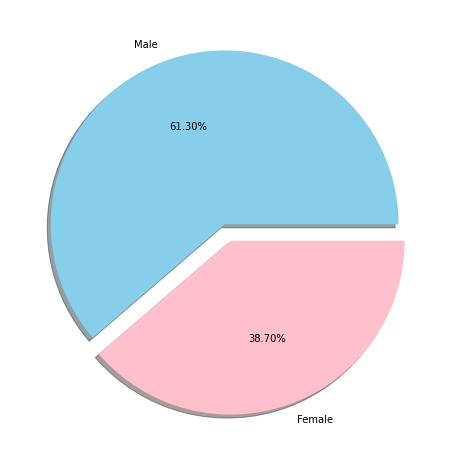

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

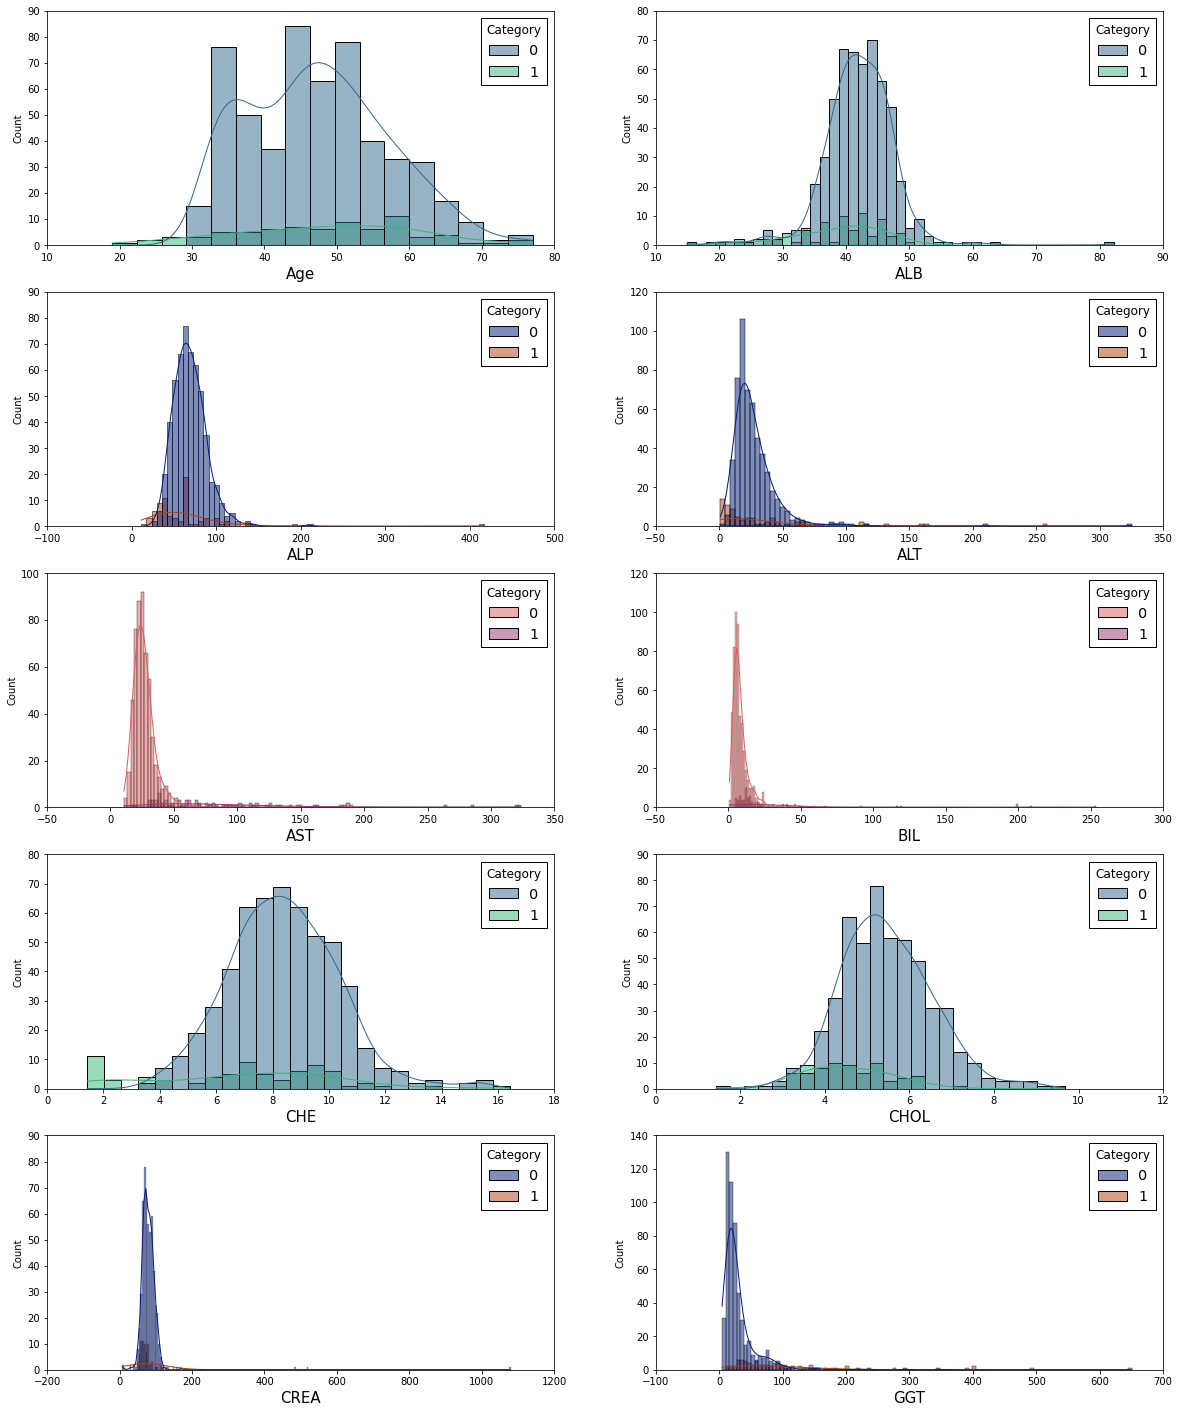

In [ ]:
fig, ax =plt.subplots(5,2, figsize=(20,25)) 
plt.style.use("classic")


sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("ALB",fontsize=15)


sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("ALT",fontsize=15)


sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("BIL",fontsize=15)


sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("CHOL",fontsize=15);


sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("GGT",fontsize=15);

In [ ]:
# X data
X = df.drop("Category", axis=1)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
# y data
y = df["Category"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test)


(492, 123)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 88.6178861788618


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


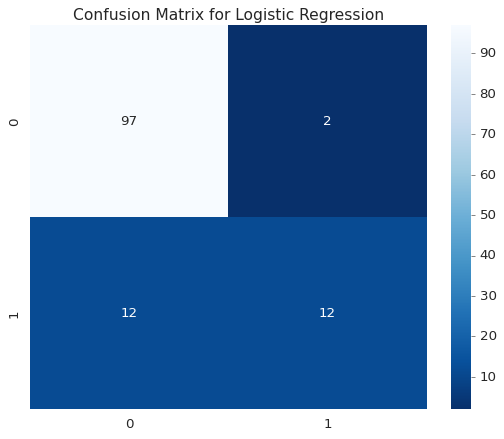

In [ ]:
# Having a look at the confusion matrix for Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
# Having a look at the classification report of Logistic Regression

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.86      0.50      0.63        24

    accuracy                           0.89       123
   macro avg       0.87      0.74      0.78       123
weighted avg       0.88      0.89      0.87       123



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RandomForestClassifierScore = rfc.score(X_test,y_test)
print("Accacy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accacy obtained by Random Forest Classifier : 91.869918699187


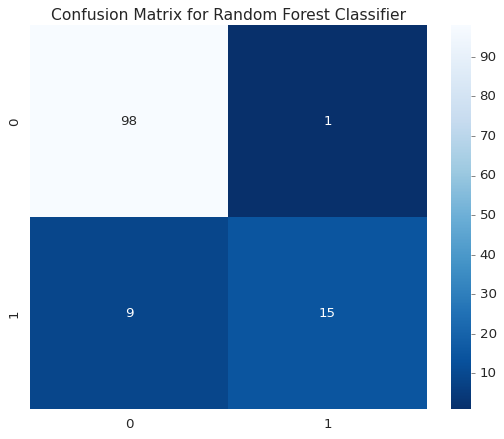

In [ ]:
# Confusion Matrix of Random Forest Classifier

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        99
           1       0.94      0.62      0.75        24

    accuracy                           0.92       123
   macro avg       0.93      0.81      0.85       123
weighted avg       0.92      0.92      0.91       123



Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier : 91.05691056910568
